In [121]:
import numpy as np
from numba import jit
@jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0
@jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [122]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,origin='lower') 
    
    return fig

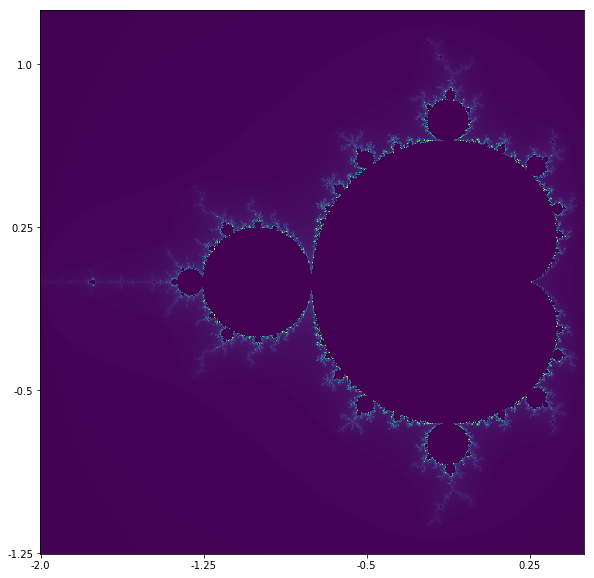

In [123]:
fig=mandelbrot_image(-2.0,0.5,-1.25,1.25)
fig.canvas.draw()